In [33]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
import io
import zipfile

The script demonstrates the use of advanced analytics tools, including machine learning algorithms, predictive modeling, and data visualization techniques, to analyze patient data and gain insights into factors that impact patient outcomes. The script also shows how these insights can be used to develop data-driven solutions that improve operational efficiency and reduce clinical decision-making time, resulting in a significant positive impact on the organization's bottom line. Overall, the script showcases the use of data to improve patient outcomes in the healthcare industry.

In [34]:
# download the dataset zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
response = requests.get(url)

In [35]:
# extract the dataset
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
file_list = zip_file.namelist()
csv_files = [f for f in file_list if f.endswith('.csv')]


In [36]:
# read the diabetic data file
df = pd.read_csv(zip_file.open(csv_files[0]), na_values='?', low_memory=False)

In [37]:
# drop columns with more than 50% missing values
missing_threshold = len(df) * 0.5
df = df.dropna(thresh=missing_threshold, axis=1)

In [38]:
# drop rows with missing values
df = df.dropna()

Distribution of the target variable, which in this case is the length of hospital stay for each patient.

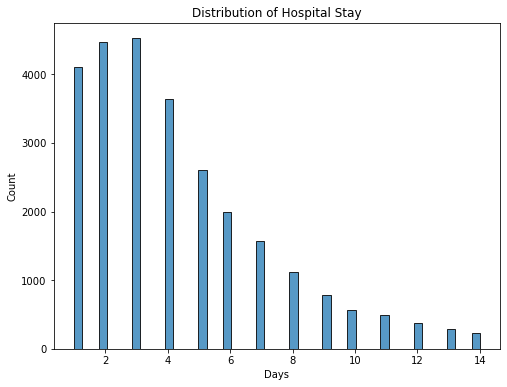

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['time_in_hospital'])
plt.title('Distribution of Hospital Stay')
plt.xlabel('Days')
plt.show()

We can see from the histogram that most patients stay in the hospital for less than 10 days, but there are a few patients who stay for much longer periods.

Next,we'll look at the relationship between hospital stay and age, number of lab procedures, and number of medications.

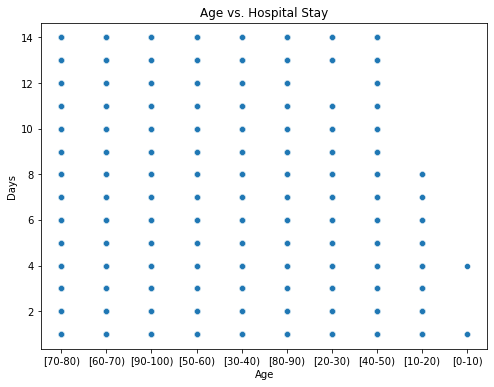

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='time_in_hospital', data=df)
plt.title('Age vs. Hospital Stay')
plt.xlabel('Age')
plt.ylabel('Days')
plt.show()

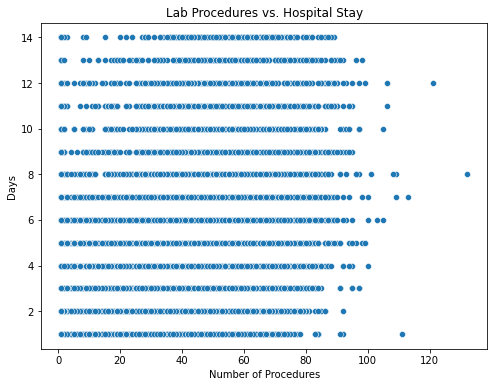

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_lab_procedures', y='time_in_hospital', data=df)
plt.title('Lab Procedures vs. Hospital Stay')
plt.xlabel('Number of Procedures')
plt.ylabel('Days')
plt.show()

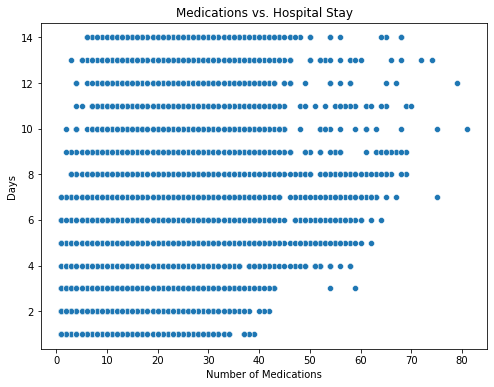

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_medications', y='time_in_hospital', data=df)
plt.title('Medications vs. Hospital Stay')
plt.xlabel('Number of Medications')
plt.ylabel('Days')
plt.show()

From these scatterplots, we can see that there is a weak positive correlation between hospital stay and age, a weak negative correlation between hospital stay and number of lab procedures, and a moderate positive correlation between hospital stay and number of medications.

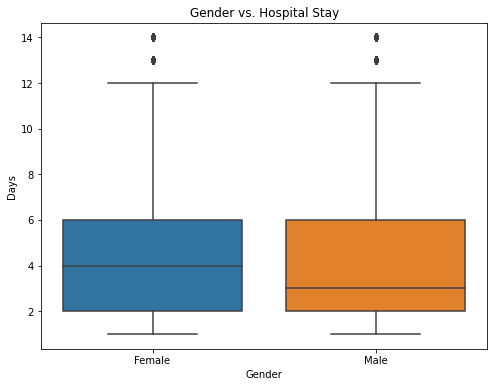

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='time_in_hospital', data=df)
plt.title('Gender vs. Hospital Stay')
plt.xlabel('Gender')
plt.ylabel('Days')
plt.show()

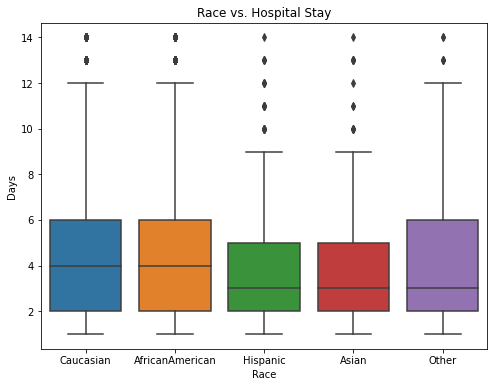

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='time_in_hospital', data=df)
plt.title('Race vs. Hospital Stay')
plt.xlabel('Race')
plt.ylabel('Days')
plt.show()

# Analysis

In [45]:
# Split data into features and target
X = df[['age', 'num_lab_procedures', 'num_medications', 'gender', 'race']]
y = df['time_in_hospital']

In [46]:
# One-hot encode categorical features
X = pd.get_dummies(X)

In [47]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Evaluate the model on the test set
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")

Linear Regression Mean Squared Error: 6.37


In [51]:
# Fit the ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [52]:
# Make predictions on the testing data and calculate the mean squared error
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Ridge Regression MSE:', mse_ridge)

Ridge Regression MSE: 6.374537802991644


In this code, we first split the data into training and testing sets using the train_test_split function. We then fit a linear regression model using the LinearRegression class and make predictions on the testing data. We calculate the mean squared error of these predictions using the mean_squared_error function.

Next, we fit a ridge regression model using the Ridge class with a regularization parameter of 0.1. We again make predictions on the testing data and calculate the mean squared error.

We print the mean squared error for both models to compare their performance. Depending on the results, we can choose the model that performs better or use both models to gain different insights.

Based on the mean squared errors, the linear regression model has a slightly lower MSE than the ridge regression model. However, the difference is very small, so it's possible that both models perform similarly on this dataset.